In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("iris.csv")
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [3]:
X = df.iloc[:,:4].values
y = df['variety'].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [12]:
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)
print("Accuracy Linear Kernel:", accuracy_lin)
print("Accuracy Polynomial Kernel:", accuracy_poly)
print("Accuracy Radial Basis Kernel:", accuracy_rbf)
print("Accuracy Sigmoid Kernel:", accuracy_sig)

Accuracy Linear Kernel: 0.9666666666666667
Accuracy Polynomial Kernel: 0.9666666666666667
Accuracy Radial Basis Kernel: 0.9333333333333333
Accuracy Sigmoid Kernel: 0.8666666666666667


In [19]:
cf_matrix_linear = confusion_matrix(y_test, linear.predict(X_test))
cf_matrix_poly = confusion_matrix(y_test, linear.predict(X_test))
cf_matrix_rbf = confusion_matrix(y_test, linear.predict(X_test))
cf_matrix_sig = confusion_matrix(y_test, linear.predict(X_test))

<AxesSubplot:>

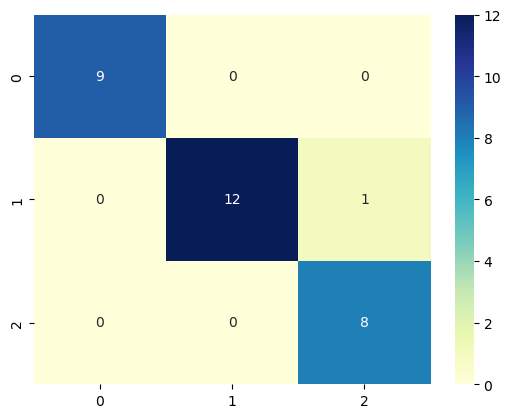

In [31]:
sns.heatmap(cf_matrix_linear, annot=True, cmap="YlGnBu")